From Raghu:
1. correlation matrix, for each team
2. for each opponent, find wins, loses and ties
3. what was the magnitude of win, loss or tie?
4. For 
* i)win look at conversion, pass diff, poss diff, ruck maul diff etc..
* ii) For loss, same…
* iii) For tie, same…
5. Look at, for ex. against Fiji, lost most matches
6. which other team won most matches against fiji
7. repeat number 4 I) ii) and iii)
*repeat

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [31]:
df = pd.read_csv('../data/output/final_diffs_all.csv')

In [32]:
df.shape

(156, 14)

In [9]:
# Get layout of data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
Opp                            156 non-null object
Tournament                     156 non-null object
Poss_Time_Diff                 156 non-null float64
Score_Diff                     141 non-null float64
Conv_Diff                      141 non-null float64
Tries_Diff                     141 non-null float64
Passes_Diff                    156 non-null float64
Contestable_KO_Win_pct_Diff    56 non-null float64
PenFK_Against_Diff             135 non-null float64
RuckMaul_Diff                  110 non-null float64
Ruck_Win_pct_Diff              63 non-null float64
Cards_diff                     2 non-null float64
Lineout_Win_Pct_Diff           154 non-null float64
Scrum_Win_Pct_Diff             85 non-null float64
dtypes: float64(12), object(2)
memory usage: 17.1+ KB


In [39]:
#Find NAs
df.isnull().sum()

Opp                              0
Tournament                       0
Poss_Time_Diff                   0
Score_Diff                      15
Conv_Diff                       15
Tries_Diff                      15
Passes_Diff                      0
Contestable_KO_Win_pct_Diff    100
PenFK_Against_Diff              21
RuckMaul_Diff                   46
Ruck_Win_pct_Diff               93
Cards_diff                     154
Lineout_Win_Pct_Diff             2
Scrum_Win_Pct_Diff              71
dtype: int64

In [127]:
# Replace NaN's with zero
df.fillna(value=0, inplace=True)

In [12]:
# look at the distribution of the data
df.describe()

,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0,156.000000,156.000000
mean,9.903164,6.227837,6.551180,-0.016743,16.776721,0.003053,-3.144950,-1.264754,0.023504,0.0,0.050458,0.020833
std,20.909780,34.037923,32.938103,0.433458,27.354524,0.242928,33.673288,26.429948,0.141293,0.0,0.181625,0.100011
min,-43.478261,-66.666667,-66.666667,-1.000000,-58.490566,-1.666667,-71.428571,-66.666667,-0.500000,0.0,-0.550000,0.000000
25%,-3.485695,-16.666667,-14.285714,-0.258929,1.190476,0.000000,-33.333333,-11.904762,0.000000,0.0,-0.083333,0.000000
50%,10.098583,0.000000,0.000000,0.000000,15.767045,0.000000,0.000000,0.000000,0.000000,0.0,0.069444,0.000000
75%,23.370749,33.333333,33.333333,0.250000,34.435096,0.000000,20.000000,0.000000,0.000000,0.0,0.166667,0.000000
max,72.272727,80.769231,77.777778,1.000000,90.909091,1.333333,66.666667,60.000000,0.750000,0.0,0.500000,0.666667


In [30]:
# Head() the dataframe
df.head(5)

,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,0.000000,0.000000,0.000000,0.333333,0.0,0.083333,0.0,0
1,WALES,2015_Cape_Town,7.471264,15.555556,14.285714,0.083333,27.868852,0.000000,-20.000000,0.000000,0.000000,0.0,0.250000,0.0,1
2,KENYA,2015_Cape_Town,-33.136095,-44.444444,-33.333333,-0.750000,-10.638298,-0.166667,66.666667,60.000000,0.000000,0.0,-0.550000,0.0,0
3,NEW ZEALAND,2015_Cape_Town,51.758794,33.333333,33.333333,0.000000,76.119403,0.000000,-50.000000,0.000000,0.000000,0.0,0.250000,0.0,1
4,FIJI,2015_Cape_Town,12.880562,-20.833333,-25.000000,0.266667,38.461538,0.000000,-33.333333,-33.333333,0.000000,0.0,0.208333,0.0,0


In [167]:
# create result: win = 1, loss = 0
# if 'Score_Diff' is > 0 = win, if < 0, else tie
def createResult(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    elif x == 0:
        return 2

df.loc[:,'Result'] = df.loc[:,'Score_Diff'].apply(createResult)


TypeError: cannot convert the series to <class 'int'>

In [165]:
#check datatypes of all features
df.dtypes

Opp                             object
Tournament                      object
Poss_Time_Diff                 float64
Score_Diff                     float64
Conv_Diff                      float64
Tries_Diff                     float64
Passes_Diff                    float64
Contestable_KO_Win_pct_Diff    float64
PenFK_Against_Diff             float64
RuckMaul_Diff                  float64
Ruck_Win_pct_Diff              float64
Cards_diff                     float64
Lineout_Win_Pct_Diff           float64
Scrum_Win_Pct_Diff             float64
Result                         float64
dtype: object

In [41]:
# Accessing the features (column names)
df.columns

Index(['Opp', 'Tournament', 'Poss_Time_Diff', 'Score_Diff', 'Conv_Diff',
       'Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff',
       'PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff',
       'Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result'],
      dtype='object')

In [92]:
#Get value counts of a column
#Use for any/all columns
df.Ruck_Win_pct_Diff.value_counts()

 0.000000    48
 0.333333     5
 0.500000     5
-0.500000     3
 0.250000     1
 0.750000     1
Name: Ruck_Win_pct_Diff, dtype: int64

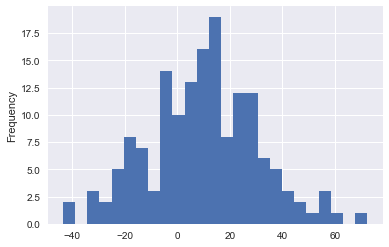

In [89]:
#Plot values for Poss_Time_Diff column
#Use for any/all columns
df.Poss_Time_Diff.plot('hist', bins=25)

In [169]:
print(df.dtypes)

Opp                             object
Tournament                      object
Poss_Time_Diff                 float64
Score_Diff                     float64
Conv_Diff                      float64
Tries_Diff                     float64
Passes_Diff                    float64
Contestable_KO_Win_pct_Diff    float64
PenFK_Against_Diff             float64
RuckMaul_Diff                  float64
Ruck_Win_pct_Diff              float64
Cards_diff                     float64
Lineout_Win_Pct_Diff           float64
Scrum_Win_Pct_Diff             float64
Result                           int64
dtype: object


In [30]:
# Accessing the index (row names)
df.index

RangeIndex(start=0, stop=312, step=1)

## Cleanup

In [ ]:
#Coerce Result to Int
df['Result'] = df['Result'].astype(int)

In [43]:
## Apply upper() to 'Opp' column to make all team names uppercase
df['Opp'] = df['Opp'].str.upper()

## Compare Results

In [135]:
#Count wins against opponents
usa_w_opp = df['Opp'][df['Result'] == 1]
usa_l_opp = df['Opp'][df['Result'] == 0]
usa_t_opp = df['Opp'][df['Result'] == 2]
print("USA Wins against opponents") 
print(usa_w_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))
print('\n')
print("USA Losses against opponents") 
print(usa_l_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))
print('\n')
print("USA Ties against opponents")      
print(usa_t_opp.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True))

USA Wins against opponents
ARGENTINA       8
WALES           7
SAMOA           7
AUSTRALIA       6
CANADA          6
NEW ZEALAND     5
FIJI            5
FRANCE          4
PORTUGAL        4
RUSSIA          4
SCOTLAND        4
ENGLAND         3
SPAIN           3
JAPAN           2
KENYA           2
SOUTH AFRICA    2
PNG             1
UGANDA          1
Name: Opp, dtype: int64


USA Losses against opponents
SOUTH AFRICA    12
NEW ZEALAND     10
FIJI             8
ENGLAND          6
SCOTLAND         6
AUSTRALIA        6
ARGENTINA        6
KENYA            5
WALES            4
SAMOA            3
CANADA           3
FRANCE           3
URUGUAY          1
RUSSIA           1
PORTUGAL         1
CHILE            1
JAPAN            1
Name: Opp, dtype: int64


USA Ties against opponents
FRANCE    2
CANADA    2
KENYA     1
Name: Opp, dtype: int64


In [ ]:
#Get all USA Wins
usa_w = df[df['Result'] == 1]
#Get all USA Losses
usa_l = df[df['Result'] == 0]
#Get all USA Ties
usa_t = df[df['Result'] == 2]

In [ ]:
# Create DFs With only numerical values
cols = ['Poss_Time_Diff', 'Score_Diff', 'Conv_Diff','Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff','Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result']
#usa_w_num = df[['Poss_Time_Diff', 'Score_Diff', 'Conv_Diff','Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff','PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff','Cards_diff', 'Lineout_Win_Pct_Diff', 'Scrum_Win_Pct_Diff', 'Result']]
usa_w_num = usa_w[cols]
usa_l_num = usa_l[cols]
usa_t_num = usa_t[cols]

In [316]:
#Select all USA losses against Fiji i.e., 'Result' == 0 (USA's Result)
usa_L_v_fiji = df.query('Opp == "FIJI"')[df.Result == 0]

#get the mean difference in losses to Fiji
usa_L_v_fiji.mean()

#print("USA losses to Fiji")
#print('\n')
#print(usa_L_v_fiji)
#print('\n')
print('Mean difference in USA losses to Fiji')
print('\n')
print(usa_L_v_fiji.mean())

Mean difference in USA losses to Fiji


Poss_Time_Diff                  4.051256
Score_Diff                    -26.293572
Conv_Diff                     -23.204365
Tries_Diff                     -0.229167
Passes_Diff                    11.543571
Contestable_KO_Win_pct_Diff     0.000000
PenFK_Against_Diff             -7.539683
RuckMaul_Diff                  -5.833333
Ruck_Win_pct_Diff               0.000000
Cards_diff                      0.000000
Lineout_Win_Pct_Diff            0.079018
Scrum_Win_Pct_Diff              0.000000
Result                          0.000000
dtype: float64


/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [347]:
#Function to iterate through list of opponents and generate mean diff for w,l,t
#for each opponent, find wins, loses and ties
#what was the magnitude of win, loss or tie?

#first, get a list of all opponents
#List unique values in the df['name'] column
opponents = df.Opp.unique()
#coerce to a list
opponents = list(opponents)

tmp = pd.DataFrame(columns=['Opp', 'Poss_Time_Diff', 'Score_Diff', 'Conv_Diff', 'Tries_Diff', 'Passes_Diff', 'Contestable_KO_Win_pct_Diff', 'PenFK_Against_Diff', 'RuckMaul_Diff', 'Ruck_Win_pct_Diff', 'Cards_diff', 'Lineout_Win_Pct_Diff','Scrum_Win_Pct_Diff'])
def oppstats(teams, resultcode):
    """
    get a list of teams and pass in to function
    pass resultcode (0 = loss, 1=win, 2=ties)
    """
    for team in teams:
        #print(team)
        #Select all USA losses against Fiji i.e., 'Result' == 0 (USA's Result)
        #usa_L_v_fiji = df.query('Opp == "FIJI"')[df.Result == 0]
        oppdf = df.query('(Opp == @team) & (Result == @resultcode)')
        """
        print(teams.index(team))
        if resultcode == 0:
            print("Lossese Against")
        elif resultcode == 1:
            print("Wins Against")
        elif resultcode == 2:
            print("Ties With")
        print(team)
        """
        tmp.Opp = teams
        tmp.loc[teams.index(team)] = oppdf.iloc[:, 1:].mean(numeric_only=True)

In [348]:
oppstats(opponents, 1)
#oppstats(opponents, 0)
#oppstats(opponents, 2)
tmp

,Opp,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff
0,AUSTRALIA,28.5718,54.6801,57.3016,-0.219444,30.3975,0,-18.6508,-10.9524,0,0,0.0322421,0
1,WALES,10.5255,39.6748,36.3265,0.277211,13.9838,0.00952381,2.9932,0,0,0,0.169104,0
2,KENYA,3.06306,17.5,16.6667,0.0416667,14.1853,0,-13.6364,-10,0,0,-0.025,0
3,NEW ZEALAND,14.3464,29.3953,25.2381,0.253333,23.6961,0,-8.85714,-1.14286,0,0,0.0624381,0
4,FIJI,34.2088,30.8984,34.381,-0.283333,46.6981,-0.1,-28.1905,-2.85714,0.166667,0,0.0733333,0.1
5,PORTUGAL,19.2239,48.9769,45.8333,0.199405,32.6157,0.0178571,0.277778,3.33333,0,0,0.112897,0.166667
6,FRANCE,21.724,32.8659,35.7143,-0.191667,26.4541,-0.0583333,15,11.6667,0.0833333,0,0.113095,0
7,SOUTH AFRICA,2.30798,19.1667,16.6667,0.166667,1.42857,0,-16.6667,-16.6667,0,0,-0.0100524,0
8,ENGLAND,15.1108,31.1021,35.5556,-0.377778,21.9927,0,5,7.14286,0,0,0.147547,0.0833333
9,RUSSIA,4.84569,49.3896,44.7619,0.4375,5.00114,0,36.25,37.5,0,0,0.0912088,0


In [349]:
opponents

['AUSTRALIA',
 'WALES',
 'KENYA',
 'NEW ZEALAND',
 'FIJI',
 'PORTUGAL',
 'FRANCE',
 'SOUTH AFRICA',
 'ENGLAND',
 'RUSSIA',
 'SCOTLAND',
 'UGANDA',
 'SAMOA',
 'ARGENTINA',
 'CANADA',
 'JAPAN',
 'CHILE',
 'PNG',
 'SPAIN',
 'URUGUAY']

In [229]:

df.query('Opp == "AUSTRALIA"')[df.Result == 0]

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Opp,Tournament,Poss_Time_Diff,Score_Diff,Conv_Diff,Tries_Diff,Passes_Diff,Contestable_KO_Win_pct_Diff,PenFK_Against_Diff,RuckMaul_Diff,Ruck_Win_pct_Diff,Cards_diff,Lineout_Win_Pct_Diff,Scrum_Win_Pct_Diff,Result
0,AUSTRALIA,2015_Cape_Town,13.966480,-10.638298,-14.285714,0.250000,25.925926,0.000000,0.000000,0.000000,0.333333,0.0,0.083333,0.0,0
67,AUSTRALIA,2016_Wellington,12.935323,-54.545455,-50.000000,-0.333333,22.857143,0.000000,7.692308,0.000000,0.250000,0.0,-0.216667,0.0,0
72,AUSTRALIA,2017_Hong_Kong,-2.232143,-15.555556,-14.285714,-0.083333,-8.196721,0.250000,-60.000000,-33.333333,0.000000,0.0,0.272727,0.0,0
123,AUSTRALIA,2017-18_Sydney_7s,6.888361,-15.555556,-14.285714,-0.083333,31.147541,-0.300000,60.000000,33.333333,0.000000,0.0,-0.116667,0.0,0
125,AUSTRALIA,2018_Vancouver_7s,19.685039,-19.230769,-25.000000,0.400000,38.461538,0.166667,33.333333,0.000000,0.000000,0.0,0.000000,0.0,0


## Plotting

In [147]:
#correlation matrix, for each team


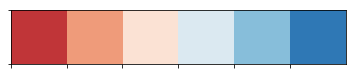

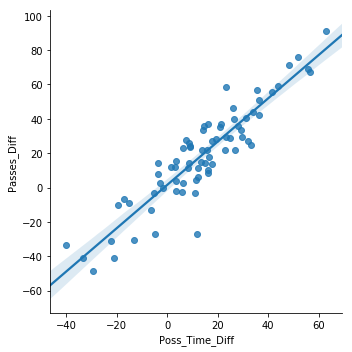

In [76]:
#Test
#sns.palplot(sns.color_palette("RdBu"))
sns.lmplot(data=usa_w_num, x='Poss_Time_Diff', y='Passes_Diff', legend=True, palette="RdBu")

## Visualize Relationships between Variables

See https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

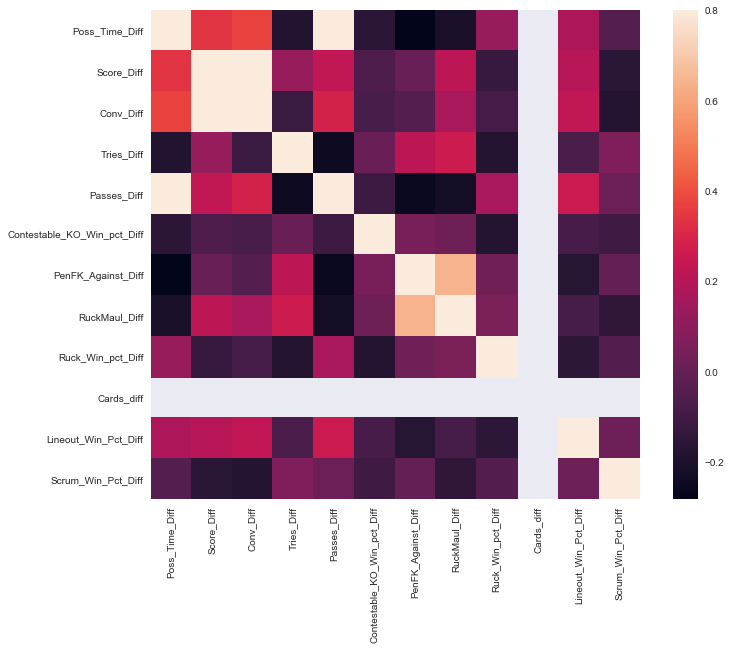

In [94]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features for USA wins

corrmat = usa_w_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

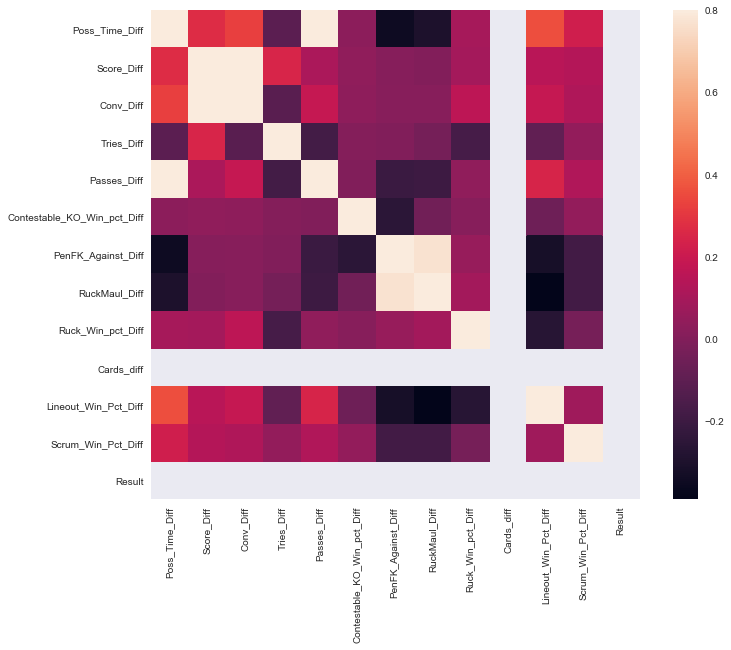

In [150]:
#Correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features for USA losses

corrmat = usa_l_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

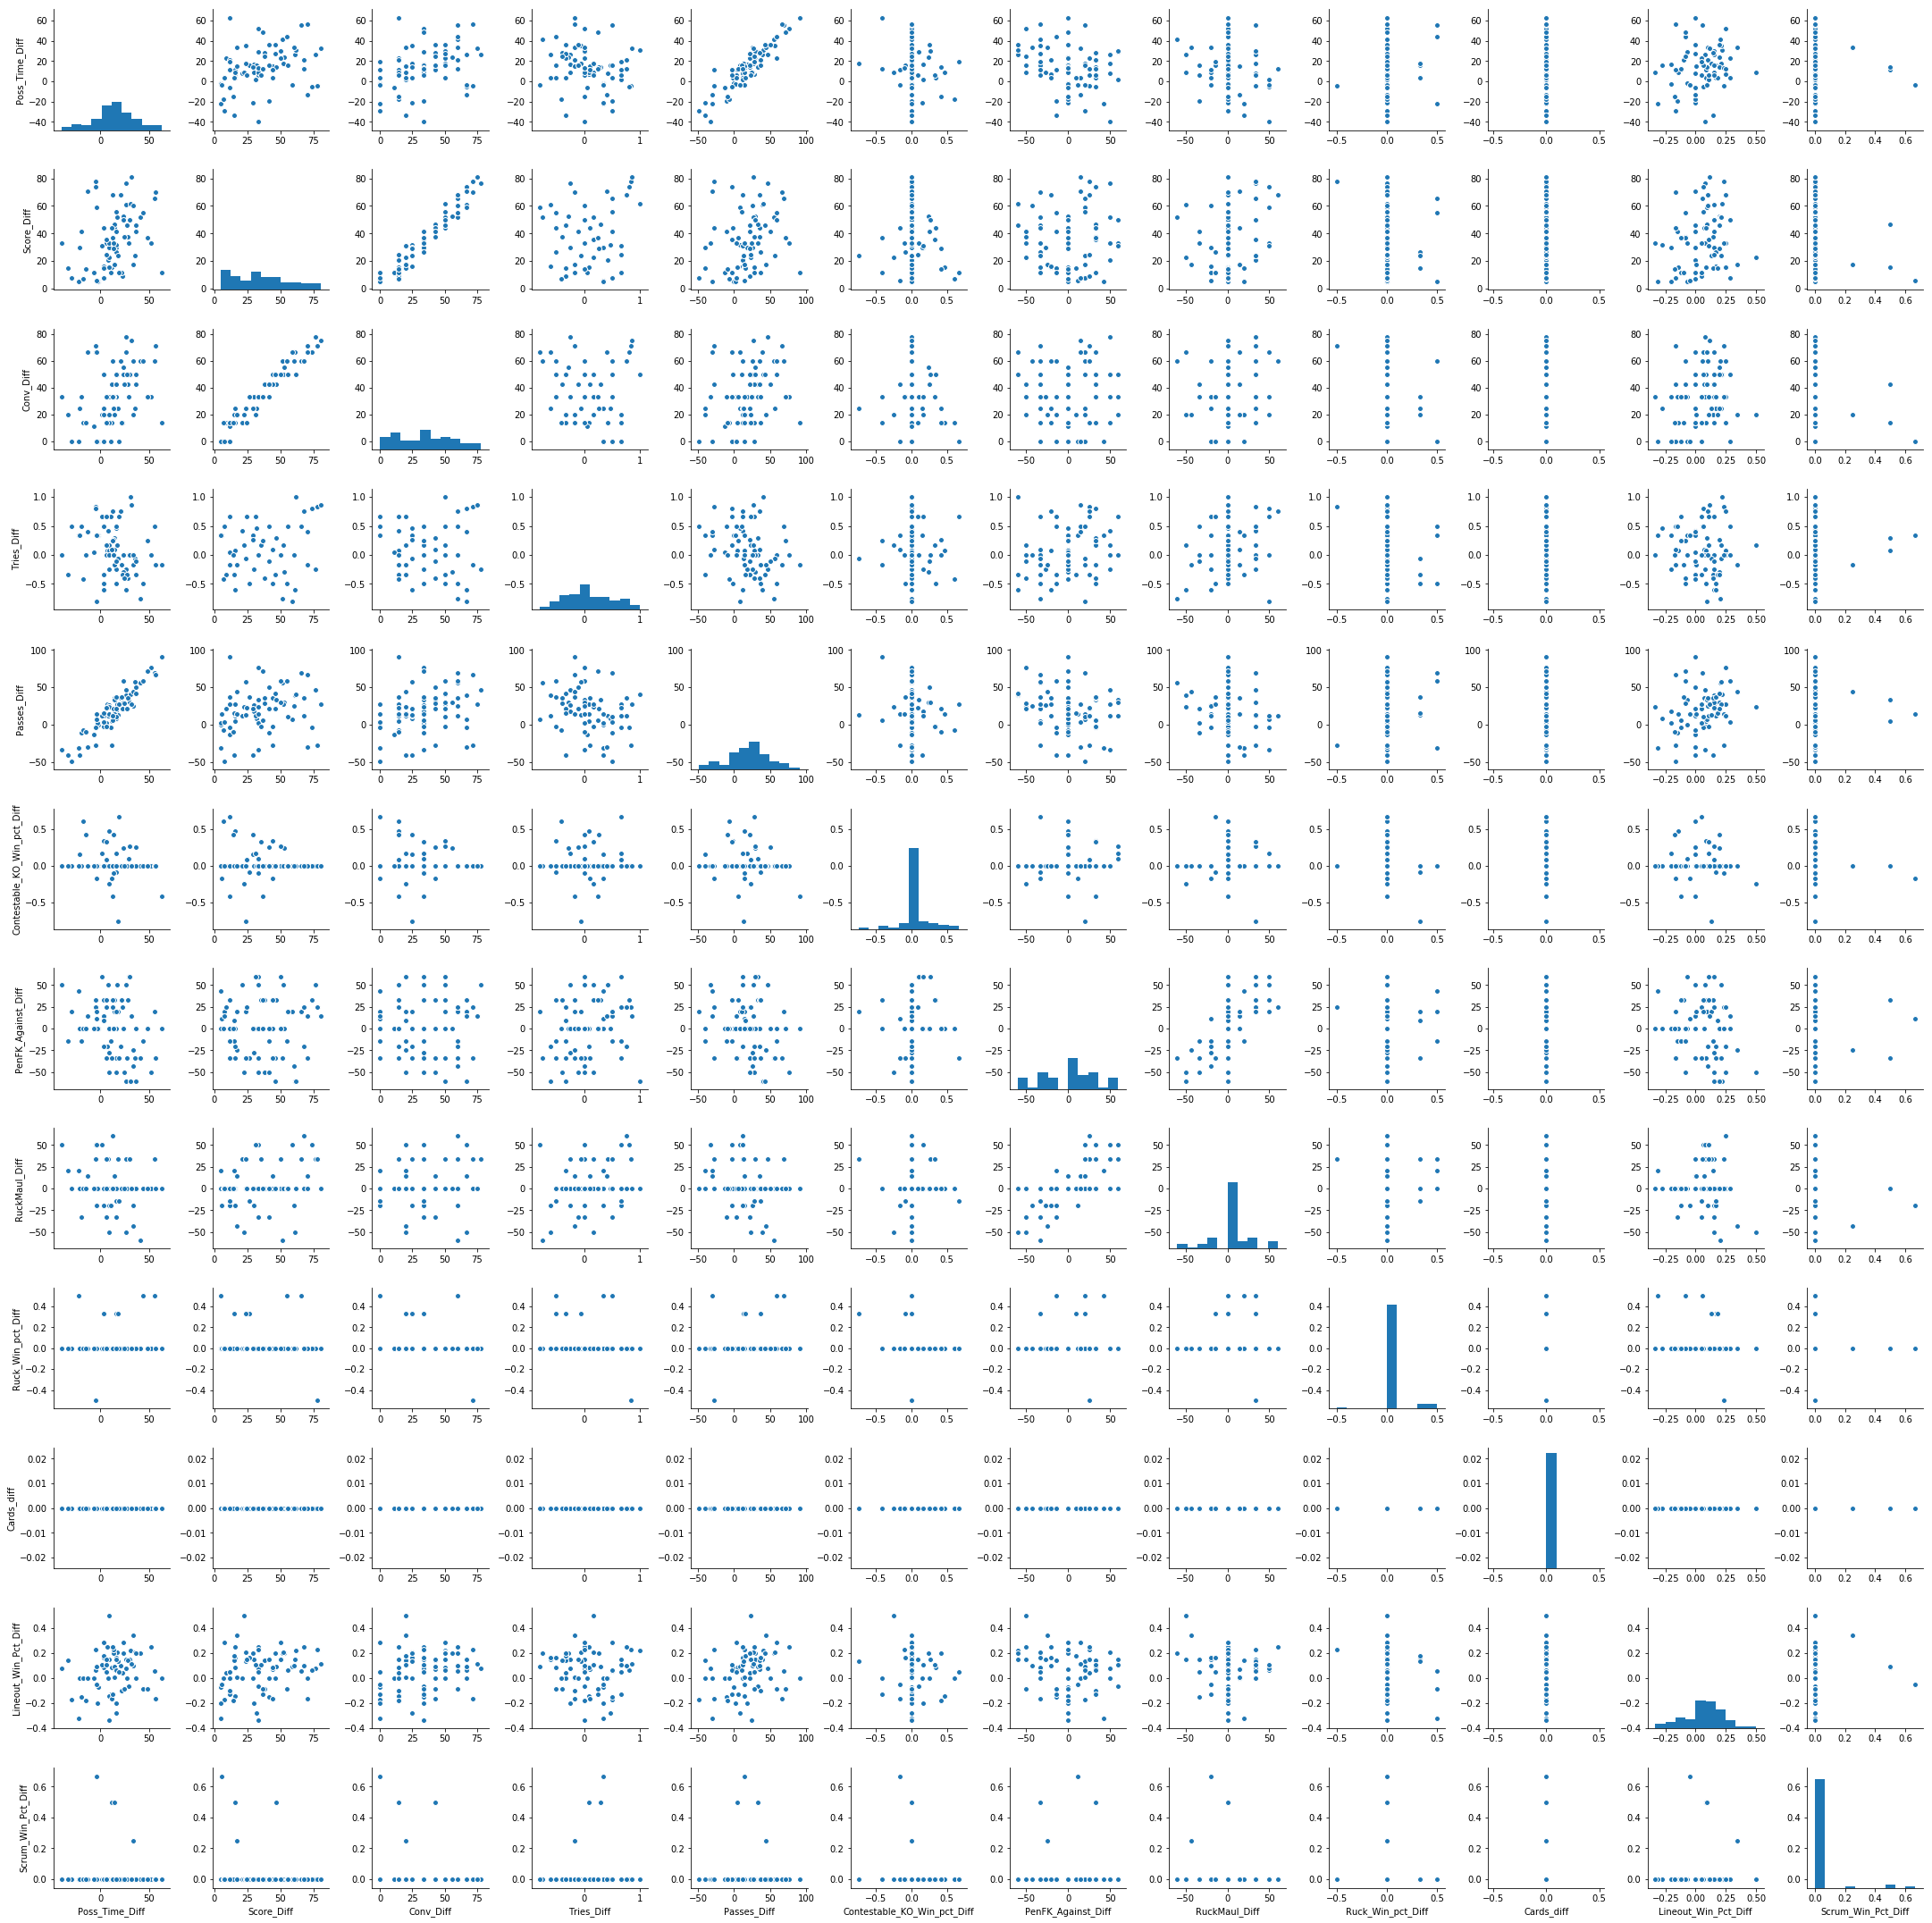

In [77]:
#Create a pairplot for all numeric variables
sns.pairplot(usa_w_num)
plt.show()

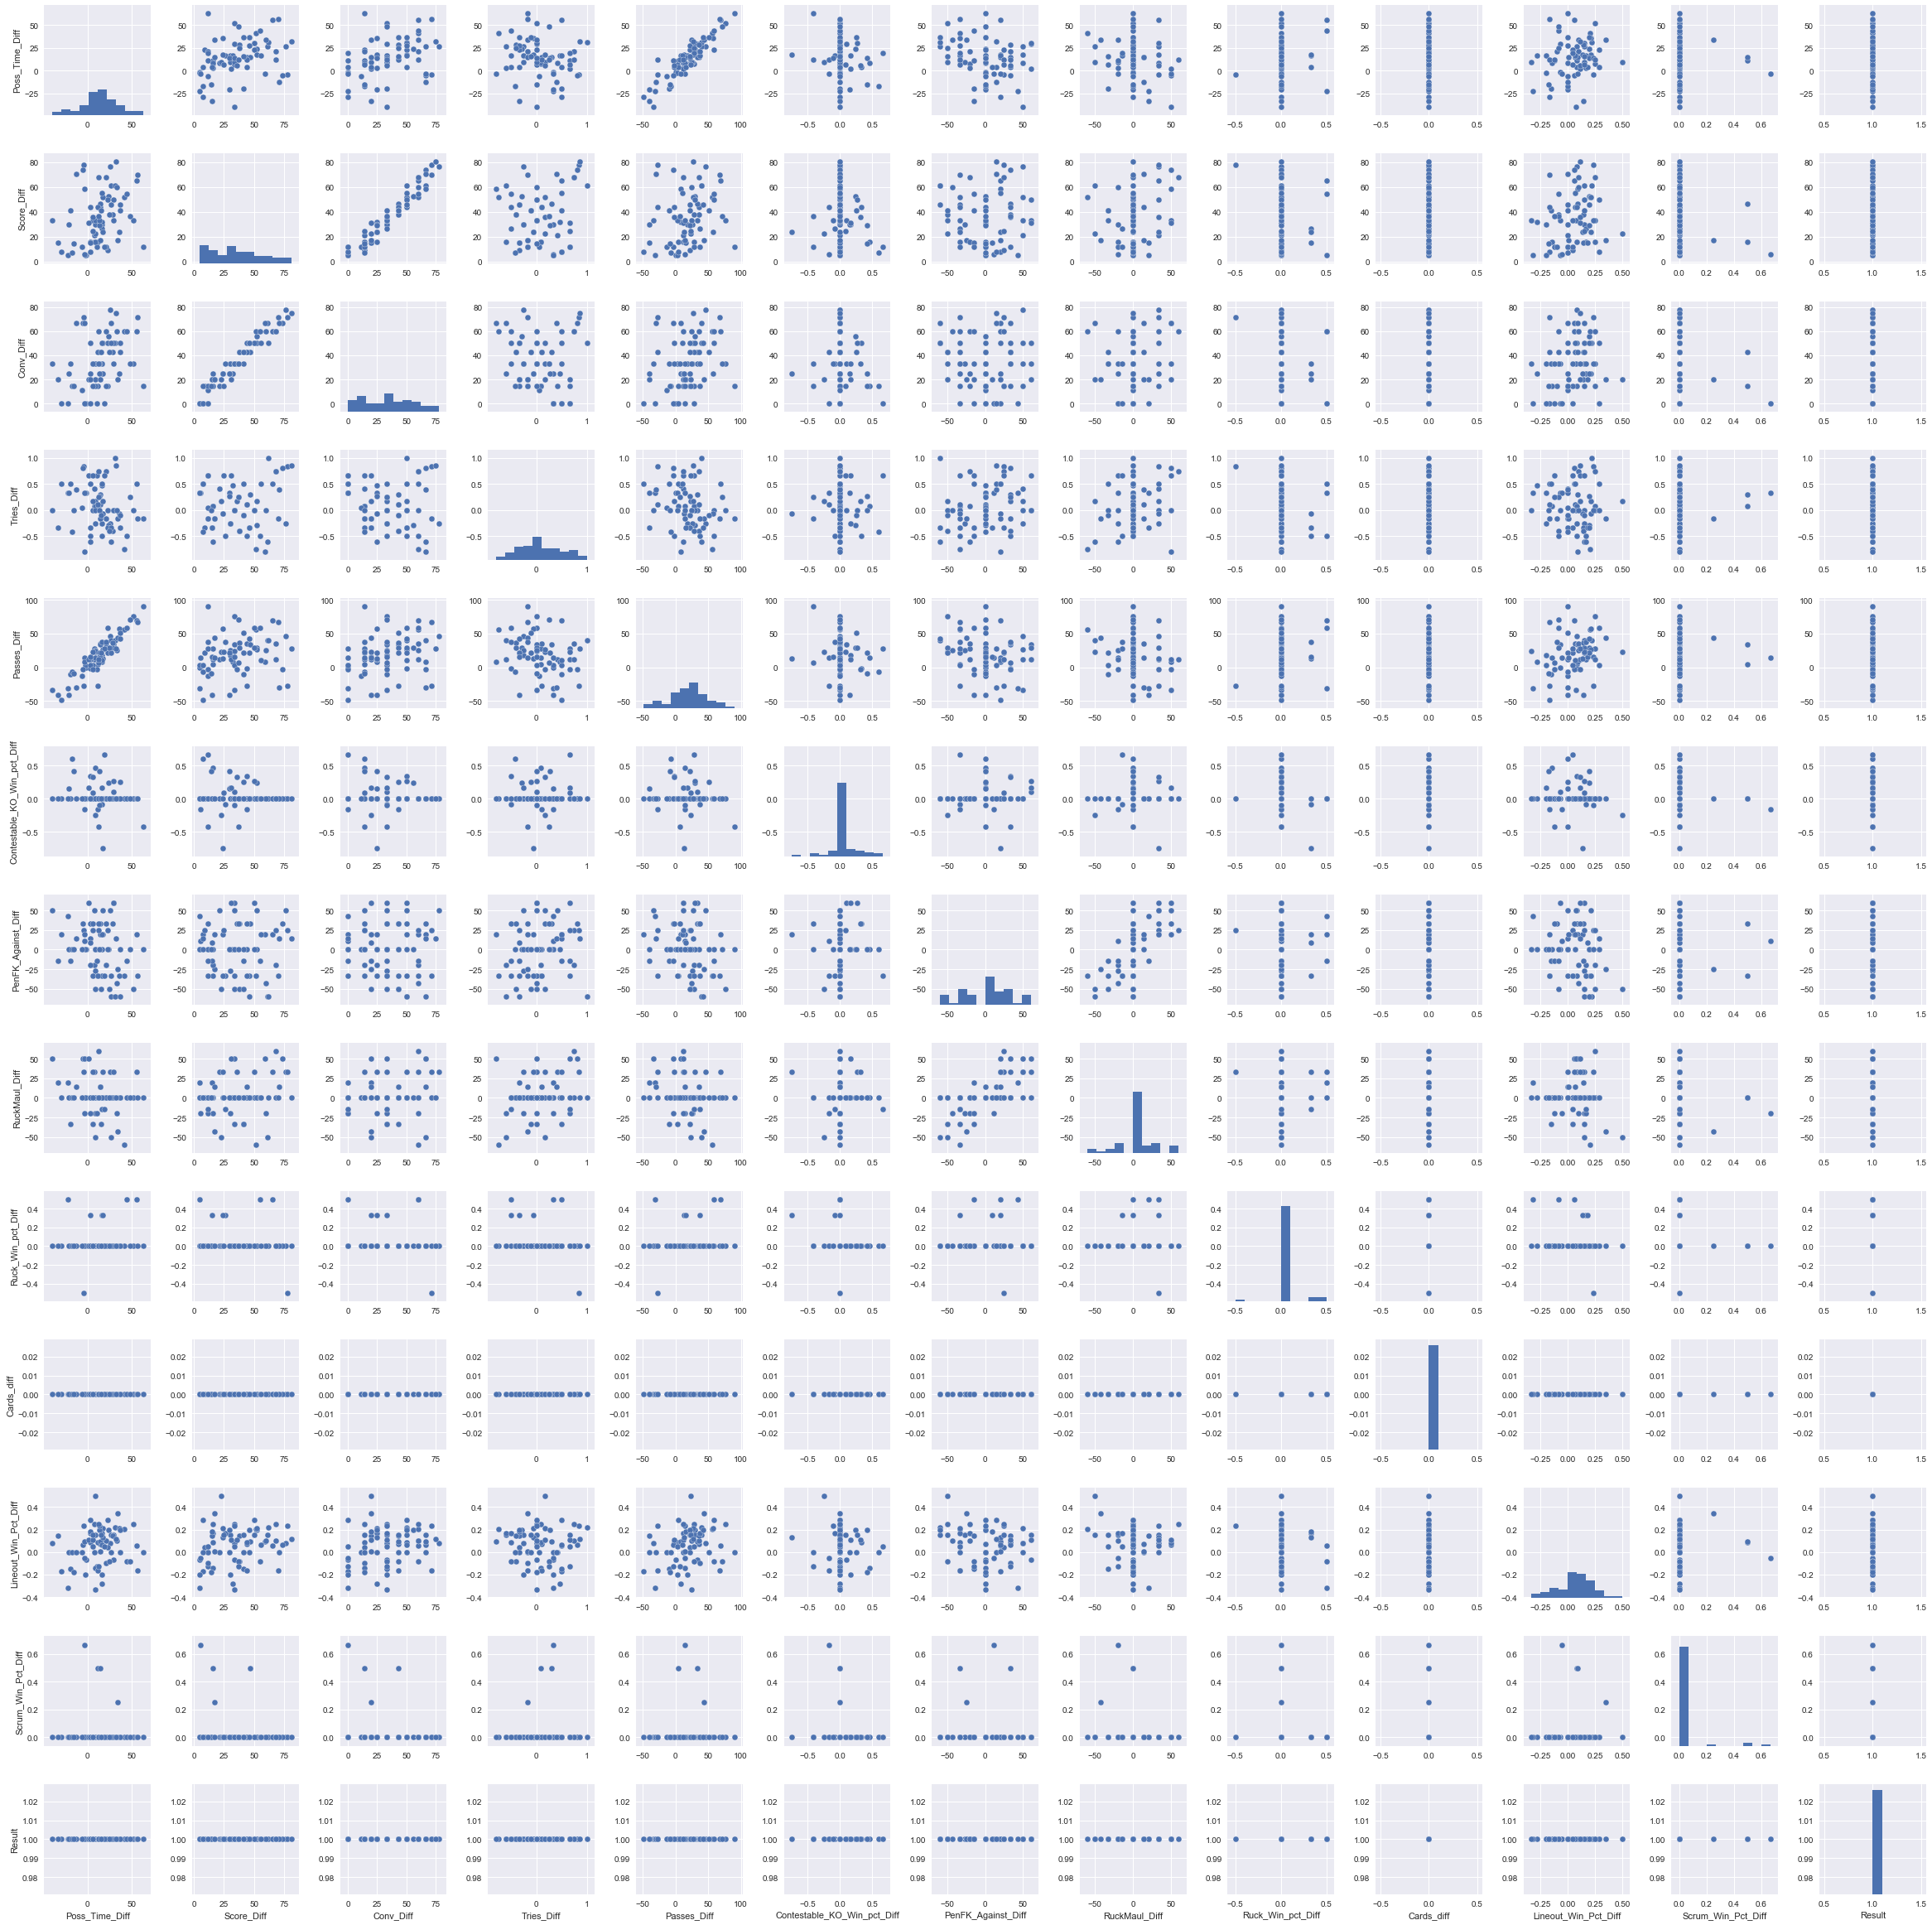

In [314]:
#scatterplot
#create a scatterplot of most correlated features

sns.set()
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(usa_w_num, size = 2.5)
plt.show();

#Plot Scatter Matrix
#scatter_matrix(usa_w_num)
#plt.show()


In [ ]:
# Random forest 